In [9]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
p = pyaudio.PyAudio() # instantiate PyAudio
chunck = 512 # number of samples per frame

In [4]:
# open stream
stream = p.open(format=pyaudio.paInt16,channels=1, rate=16000, input=True, frames_per_buffer=chunck)

In [5]:
a = stream.read(chunck) # read a chunck of data

In [6]:
data = np.fromstring(a, dtype=np.int16) # convert data to numpy array

<ipython-input-6-8c002655622f>:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(a, dtype=np.int16) # convert data to numpy array


In [7]:
print(data)

[ 0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
  0  0  0  0  1  0  0  0  1  1  0  0  0 -1  1  1  0  0  0  0  0  0  0  1
  0  0  0  1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  1 -1
  0  1 -1  0  0  0  0  0  0  0 -1  0  0  0 -1  0 -1  0  0  0  0  0 -1  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  1  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  1  0  1  0  0  1 -1  1  0  0  0
 -1 -1  0  0  0 -1  0 -1  0  0  0 -1  0  0  0  0  1  0  0  0  0  0  0  1
  0  1  0  0  0  0  0  0  1  0  0  0  1  1  0  0  0  0  0  0  0  0 -1  1
  0  0  0  0  0  0  0  1  0  0 -1  0  0  0 -1 -1  0  0  1  0 -1  0  0  0
  0  0  0 -1 -1  0  0 -1  1  0  1  0  0  0  0  0  0  1  0  0  0 -1  0  0
  0  0  0  1 -1  0  0  0  0  0  0  0  0  0  1  0  0

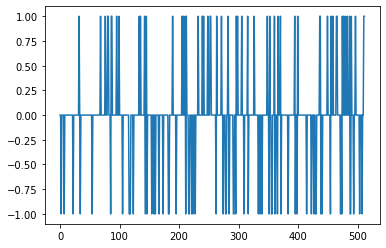

In [10]:
plt.close()
plt.plot(data)
plt.show()